In [20]:
import pandas as pd


df = pd.read_csv(r"C:\Users\DWIGHT JIRO\Downloads\retail_sales_dataset.csv")
df


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [3]:
category_counts = df['Product Category'].value_counts()
print(category_counts)


Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64


In [4]:
df.loc[df['Product Category'] == 'Beauty', 'Total Amount'].sum()



143515

In [5]:
df.loc[df['Product Category'] == 'Clothing', 'Total Amount'].sum()


155580

In [6]:
df.loc[df['Product Category'] == 'Electronics', 'Total Amount'].sum()


156905

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

category_sales = {
    'Beauty': df.loc[df['Product Category'] == 'Beauty', 'Total Amount'].sum(),
    'Clothing': df.loc[df['Product Category'] == 'Clothing', 'Total Amount'].sum(),
    'Electronics': df.loc[df['Product Category'] == 'Electronics', 'Total Amount'].sum()
}

category_sales_df = pd.DataFrame(list(category_sales.items()), columns=['Product Category', 'Total Sales'])


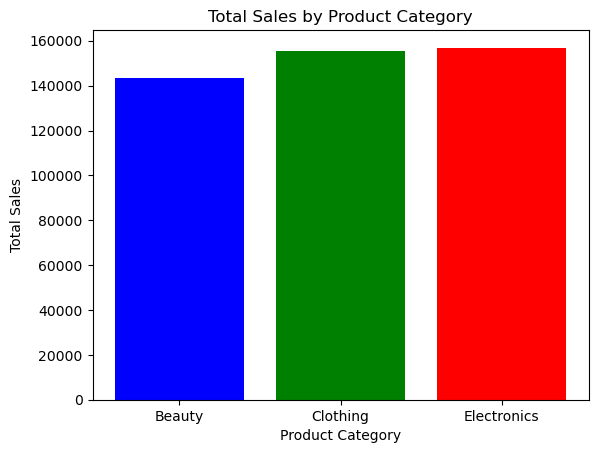

In [9]:
plt.bar(category_sales_df['Product Category'], category_sales_df['Total Sales'], color=['blue', 'green', 'red'])

plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.title('Total Sales by Product Category')

plt.show()


### Sales Distribution Analysis

This bar chart shows us the total sales by product category. After summing up, the highest sales product category will be the Electronincs followed by Clothing and lastly Beauty. The total sales for all product categort will be  

* Total Sales=156905+155580+14315 = 326,800 

* (electronics/326800)x100 = 48% 
* (clothing/326800)x100 = 47.61%
* (beauty/326800)x100 = 4.38%

Our top selling category is the Electronics, contributing 48% to the sales. Closely followed by Clothing with 47.61% while Beauty products fall in to 4.38% contribution.

 


In [22]:
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

monthly_sales = df.groupby(['year', 'month'])['Total Amount'].sum().reset_index()
max_sales_month = monthly_sales.loc[monthly_sales['Total Amount'].idxmax()]

print("Monthly Sales Data:")
print(monthly_sales)

print("\nMonth with the Highest Sales:")
print(max_sales_month)



Monthly Sales Data:
    year  month  Total Amount
0   2023      1         35450
1   2023      2         44060
2   2023      3         28990
3   2023      4         33870
4   2023      5         53150
5   2023      6         36715
6   2023      7         35465
7   2023      8         36960
8   2023      9         23620
9   2023     10         46580
10  2023     11         34920
11  2023     12         44690
12  2024      1          1530

Month with the Highest Sales:
year             2023
month               5
Total Amount    53150
Name: 4, dtype: int64


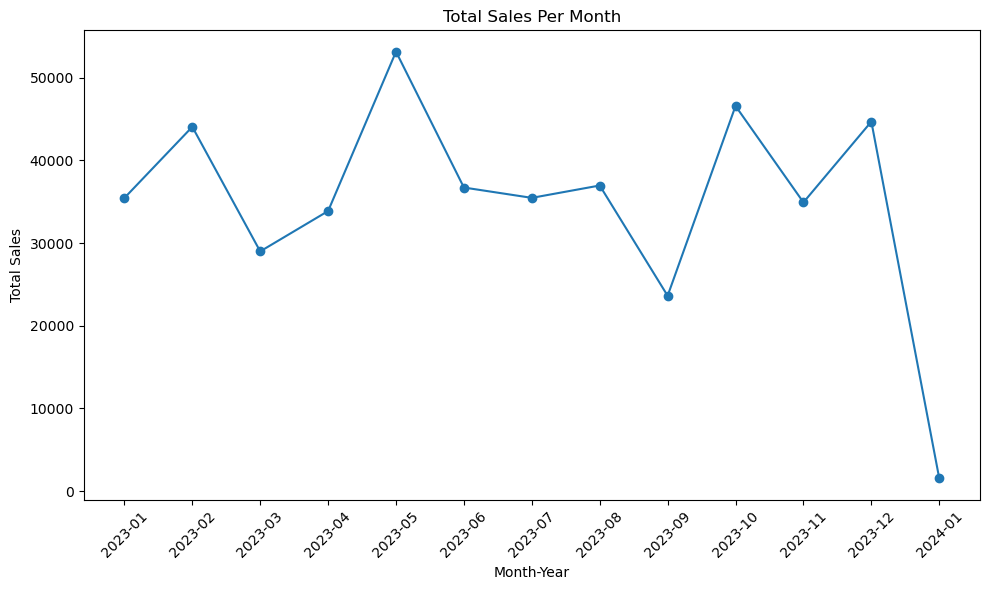

In [18]:
plt.figure(figsize=(10,6))
plt.plot(monthly_sales['month_year'].astype(str), monthly_sales['Total Amount'], marker='o')

plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.title('Total Sales Per Month')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


### Seasonal Trends

* Highest Peak Sales

The highest sales occured in May 2023, with a total amount of 53,150 sales. This shows an strong demand that could be tied to mid-year sales or some holiday like mother's day.

* Month of February and December

February 2023 and December 2023 got a high sales of 44,060 and 44,690, respectively. February sales could be because of  Valentine's Day, where certain products (like clothing or beauty products) may be in higher demand. December also got a high sales, this could be tied with Christmas and Newyear celebration.

*  Lower Sales for the month of September

September 2023 had the lowest sales with 23,620. This could be a period where consumer spending drops, possibly after summer vacation months. This could also the month where people might save their money to get ready for the incoming seasonal holidays.

* Drop sales in early January 2024

In January 2024, sales goes down to 1,530. This might reflect post-holiday fatigue, where customers are recovering from the heavy spending in December, or it could indicate low inventory after holiday sales. This is the point where most people ran out of money because of consecutive holidays in December.


#### Were Sales Influenced by Holidays or Promotions?

- Yes, the peaks in sales during February, May, October, and December likely reflect consumer behavior tied to holidays or seasonal promotions: 
February (Valentine’s Day)
May (Mother’s Day or mid-year sales)
October (possibly tied to early holiday shopping or pre-holiday discounts)
December (Christmas/New Year)


### Recomendation

* May, February, and December got a strong sales peak, it's important to be prepare for these months by ensuring the business have enough inventory, effective marketing campaigns, and considering special discounts or promotions for the active consumers.  

* September and March have a low sales numbers. Businesses might want to run special promotions during these periods to increase demand. Introducing new product lines, offering discounts, or bundling products to attract more customers. Additionally, January 2024 sales are extremely low. Running New Year's sales or clearance sales or events could help maintain momentum after the holidays.





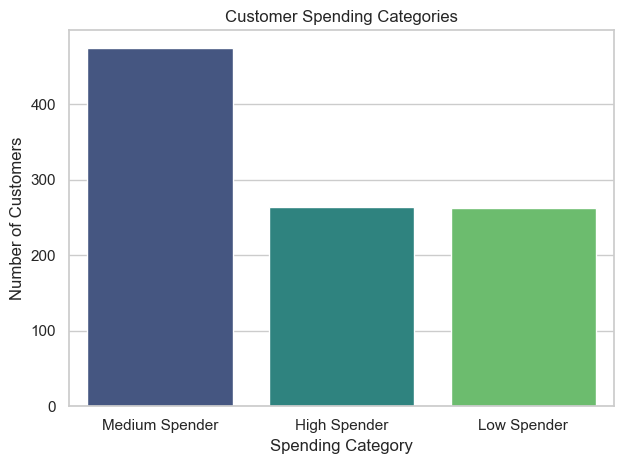

,Category,count
0,Medium Spender,474
1,High Spender,264
2,Low Spender,262


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

total_purchases = df.groupby('Customer ID')['Total Amount'].sum().reset_index()


low_threshold = total_purchases['Total Amount'].quantile(0.25)
medium_threshold = total_purchases['Total Amount'].quantile(0.50)
high_threshold = total_purchases['Total Amount'].quantile(0.75)

def categorize(row):
    if row['Total Amount'] <= low_threshold:
        return 'Low Spender'
    elif row['Total Amount'] < high_threshold:
        return 'Medium Spender'
    else:
        return 'High Spender'

total_purchases['Category'] = total_purchases.apply(categorize, axis=1)

category_counts = total_purchases['Category'].value_counts().reset_index()
data = pd.DataFrame(category_counts)

category_counts.columns = ['Category', 'Count']


sns.barplot(x='Category', y='Count', data=category_counts, palette='viridis')
plt.title('Customer Spending Categories')
plt.xlabel('Spending Category')
plt.ylabel('Number of Customers')
plt.tight_layout()

plt.show()

data




### Basic Customer Segmentation


As observed, we can see there is a huge gap between Medium spender from High and Low spender. This inidcate that there is a  significant portion of customers that is willing to spend  moderate amount of money. In easy word, customer is not too determined to spend too much to the business. This can be due to several factors but not limited to:

* Price
* Poor marketing
* Competitive brands

etc..


Business must aim to turn the medium spender and low spender to High Spender. Businesses could think of loyalty program that rewards  customers with points for every purchase, which can lead to discounts or exclusive offers. This encourages repeat purchases and customer retention that can convert to High spender customers. Beside from programs, business should also focus on their brand campaigns so they can effectively showcase and introduce their products or services to consumers more better.

Businesses should also hear from the customer by conducting a survey. This will help the businesses to drive more data that will help them to scale up more.

In conclusion, this insight can be used by Business to visualize their types of customer fron low to high consumers. This will help business to focus to such factor that will help them drive more High consumer customer and repeat customers.







In [21]:
import pandas as pd


data = pd.read_csv(r"C:\Users\DWIGHT JIRO\Downloads\StudentsPerformance_with_headers.csv")
data




,STUDENT ID,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,...,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00),COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


In [11]:
student_ave= data.groupby('STUDENT ID')['GRADE'].mean()

best_subject = course_avg.idxmax()
best_score = course_avg.max()

print("Average score per student:")
print(student_ave)

print("\nAverage score per subject:")
print(course_avg)

print(f"\nBest subject: {best_subject} with an average score of {best_score}")



Average score per student:
STUDENT ID
STUDENT1      1.0
STUDENT10     0.0
STUDENT100    7.0
STUDENT101    6.0
STUDENT102    7.0
             ... 
STUDENT95     6.0
STUDENT96     5.0
STUDENT97     7.0
STUDENT98     6.0
STUDENT99     7.0
Name: GRADE, Length: 145, dtype: float64

Average score per subject:
COURSE ID
1    2.287879
2    3.000000
3    6.125000
4    4.500000
5    5.285714
6    5.875000
7    6.333333
8    1.357143
9    2.190476
Name: GRADE, dtype: float64

Best subject: 7 with an average score of 6.333333333333333


### How can the school use this information to improve subject-specific teaching strategies?

Based from our data and computation, the Course ID "7" got the highest average grade equivalent to "BA" with 6.33 with Course ID "8" got the lowest grade equivalent to "DD".

This information can be used to determine what subject the students are having a hard time with. This will help facilities to create more strategies on which to focus on in order to improve the scores of student and at the same time maintain the good standing of scores in such subjects.


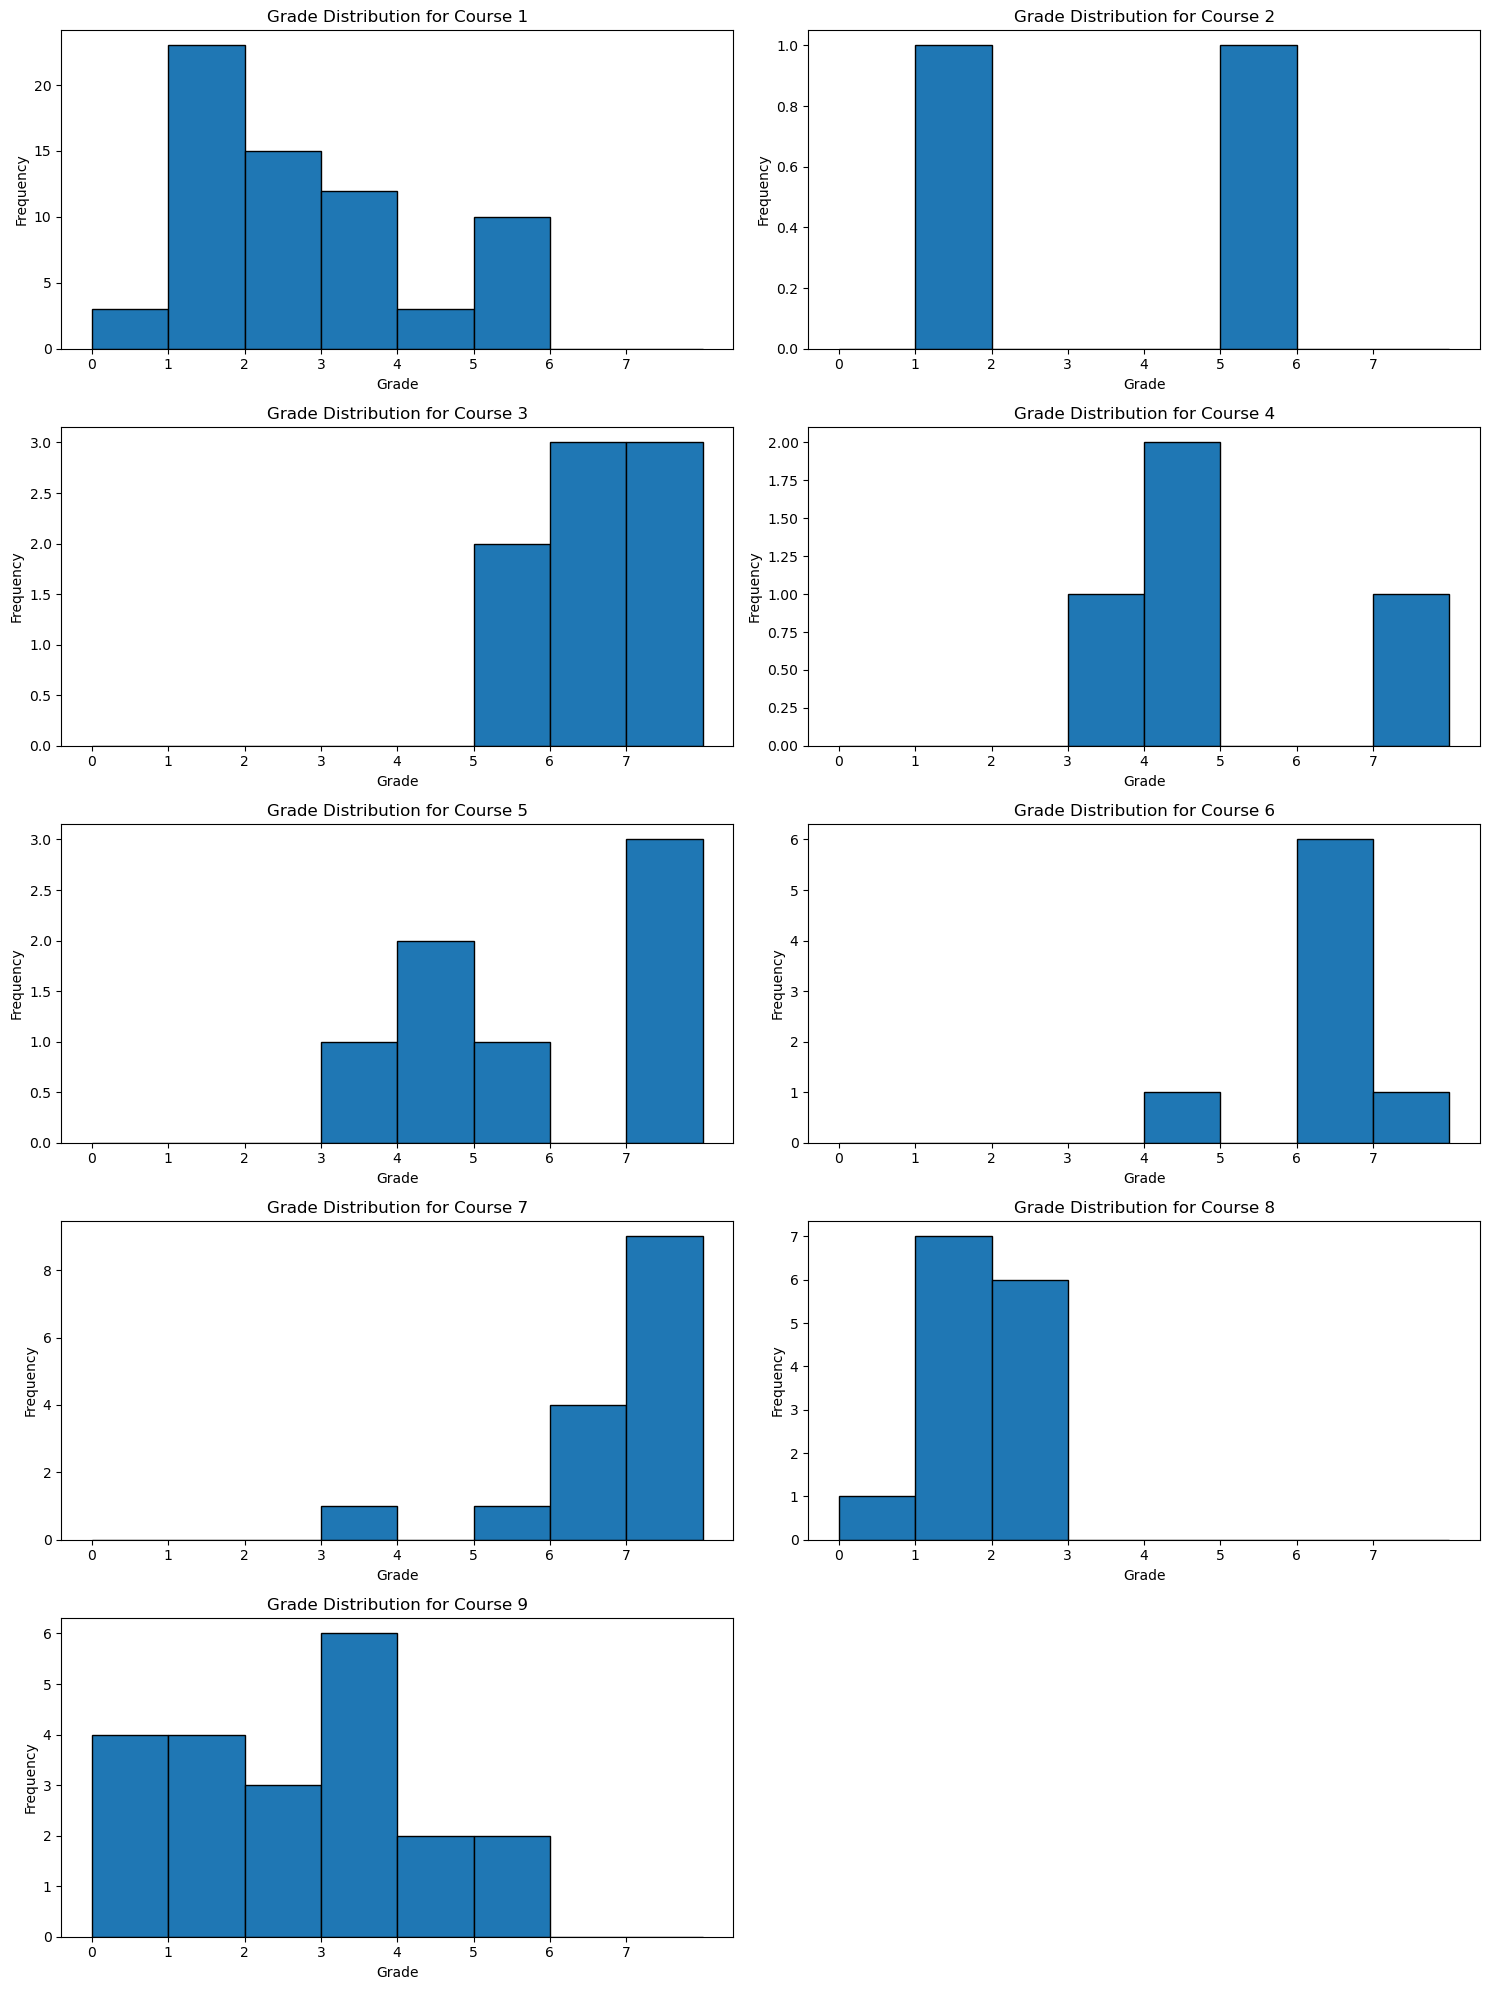

In [37]:
courses = data.groupby('COURSE ID')

num_courses = courses.ngroups
cols = 2
rows = (num_courses // cols) + (num_courses % cols)  

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 20))

axes = axes.flatten()

for idx, (course_id, course_data) in enumerate(courses):
    axes[idx].hist(course_data['GRADE'], bins=range(0, 9), edgecolor='black')
    axes[idx].set_title(f'Grade Distribution for Course {course_id}')
    axes[idx].set_xlabel('Grade')
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_xticks(range(8))

for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [38]:
print(data['GRADE'].value_counts())  # Check the grade distribution


GRADE
1    35
2    24
3    21
5    17
7    17
6    13
4    10
0     8
Name: count, dtype: int64


### Observation

Looking at the distribution of grades, the majority of student passed their subjects.  The most frequent grade is a 1 (DD) with 35 students, indicating that a large portion is just above failing. Grades between 2 and 3 (DC, CC) also have a substantial count (24 and 21 students). However, higher grades (5 and above) are less frequent, with only 17 students each achieving a grade of 5 (BB) or 7 (AA), which show fewer top performers.

This spread indicates that while many students pass, their understanding of the subject might be limited, as most are in range around the lower and middle passing grades (1-3). The low number of students receiving grades 5 to 7 implies that only a small group excels the expectation, suggesting gaps between many students.

It could be useful to identify the reasons behind this distribution to determine what is the improvement or issue that the school can improve on. Whether it's related to teaching methods, exam difficulty, or etc and explore ways to help more students reach higher levels of achievement.








In [4]:
threshold = 3

students_below_50 = data[data['GRADE'] < threshold]

percentage_below_50 = (len(students_below_50) / len(data)) * 100

print(f"Number of students scoring below 50%: {len(students_below_50)}")
print(f"Percentage of students scoring below 50%: {percentage_below_50:.2f}%")


Number of students scoring below 50%: 67
Percentage of students scoring below 50%: 46.21%


#### Weak Performers

67 out of 145 students falls below the 50% of given grade criteria (0: Fail, 1: DD, 2: DC, 3: CC, 4: CB, 5: BB, 6: BA, 7: AA). This indicate that 46.21% of students are struggling and doesn't have the strong understanding of their courses. This data shows how the school is performing and can be used as basis on what improvements can be done to lower the percentage of Weak Performs as there is only a gap of 7.58% between > = or < 50.

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 0: Fail (Grades 0, 1, 2), 1: Pass (Grades 3, 4, 5, 6, 7)
data['Pass_Fail'] = data['GRADE'].apply(lambda x: 1 if x > 0 else 0)

# X (the CGPA column) and y (the Pass/Fail target)
X = data[['Cumulative grade point average in the last semester (/4.00)']] 
y = data['Pass_Fail']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))


Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.95      1.00      0.97        35

    accuracy                           0.95        37
   macro avg       0.47      0.50      0.49        37
weighted avg       0.89      0.95      0.92        37



C:\Users\DWIGHT JIRO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DWIGHT JIRO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DWIGHT JIRO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Summary

The model has a high overall accuracy, but it primarily predicts the passing class. It fails to identify any students who actually fail (class 0). This could be due to the imbalanced dataset, where passing students are much more numerous than failing ones.